In [1]:
import pandas as pd
import subprocess
import gseapy as gp
import matplotlib.pyplot as plt

In [2]:
ct ='shared'

In [3]:
_type = 'Hyper'
_dir = '500_result'

In [4]:
output_file = f"{_dir}/{_type}.{ct}.Hotspot.Overlap.Gene.bed"

## get intersected genes

In [5]:
# gene_bed_path = '/home/qzeng/hanliu/ref/mouse/gencode/vm22/gencode.vM22.annotation.gene.flat.tsv.gz'
# gene_bed = pd.read_csv(gene_bed_path, sep = '\t')

In [6]:
# loop = 2000
# gene_bed['start'] = gene_bed['start'] -loop
# gene_bed['end'] = gene_bed['end'] + loop
# gene_bed = gene_bed[['chrom','start','end','gene_id','gene_name']]

In [7]:
# gene_bed.to_csv(f'{_dir}/vm22.GENElop2k.bed', sep = '\t', index = None, header =  None)

In [8]:
# gene_bed = pd.read_csv('vm22.GENE.bed', sep = '\t', header = None)
# gene_bed.head()

In [9]:
hotspot_bed = pd.read_csv(f'{_dir}/{_type}.hotspot.{ct}.bed', sep = '\t', header = None)
hotspot_bed.head()

,0,1,2
0,chr1,8410500,8411000
1,chr1,16503500,16504000
2,chr1,24453500,24454000
3,chr1,25994500,25995000
4,chr1,33610000,33610500


In [10]:
output_file = f"{_dir}/{_type}.{ct}.Hotspot.Overlap.Gene.bed"

In [11]:
command = f"bedtools intersect -a {_dir}/{_type}.hotspot.{ct}.bed -b vm22.GENE.bed -wa -wb > {output_file}"
command

'bedtools intersect -a 500_result/Hyper.hotspot.shared.bed -b vm22.GENE.bed -wa -wb > 500_result/Hyper.shared.Hotspot.Overlap.Gene.bed'

In [12]:
subprocess.run(command, shell=True)

CompletedProcess(args='bedtools intersect -a 500_result/Hyper.hotspot.shared.bed -b vm22.GENE.bed -wa -wb > 500_result/Hyper.shared.Hotspot.Overlap.Gene.bed', returncode=0)

## perform GO

In [13]:
overlap_df = pd.read_csv(output_file, sep = '\t', header = None)

In [14]:
all_genes = overlap_df[7].unique().tolist()

In [15]:
all_genes = [gene for gene in all_genes if not gene.startswith('Gm')]

In [16]:
# kegg_enrichment = gp.enrichr(gene_list=all_genes,
#                              gene_sets='KEGG_2019_Mouse',  
#                              organism='mouse', 
#                              #description='test_name',
#                              outdir='test/kegg', 
#                              no_plot=False, 
#                              cutoff=0.05) 

In [17]:
# kegg_enrichment.results.head()

In [18]:
go_enrichment = gp.enrichr(gene_list=all_genes,
                           gene_sets=['GO_Biological_Process_2018', 
                                      'GO_Molecular_Function_2018','KEGG_2019_Mouse'],
                           organism='mouse', # don't forget to set organism
                           #outdir='test/go', # set the output directory
                           no_plot=False, # do not draw a plot
                           cutoff=0.01) # set a significance cutoff


## plot

In [19]:
from gseapy import barplot, dotplot
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
result_df= go_enrichment.results
result_df = result_df[result_df['Adjusted P-value']  < 0.01]

In [21]:
all_terms = result_df['Term'].unique()

In [22]:
result_df.sort_values('Adjusted P-value').head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2018,nervous system development (GO:0007399),29/455,1.656979e-08,0.000016,0,0,3.701126,66.308216,PRKN;SEMA5A;TRIM71;INTU;STMN3;NRXN2;NR2E1;CYP4...
1,GO_Biological_Process_2018,positive regulation of transcription from RNA ...,42/848,1.732475e-08,0.000016,0,0,2.883170,51.525511,PRKN;NFIX;CTBP2;SCX;NPAS1;EGFR;NPAS2;DDN;RPS6K...
2,GO_Biological_Process_2018,"positive regulation of transcription, DNA-temp...",47/1120,3.415047e-07,0.000212,0,0,2.424824,36.105393,PRKN;CASZ1;NFIX;CTBP2;SCX;NPAS1;EGFR;NPAS2;DDN...
3,GO_Biological_Process_2018,regulation of transcription from RNA polymeras...,56/1478,6.459013e-07,0.000301,0,0,2.198097,31.328633,SCX;FOXQ1;RPS6KA4;SHH;TBK1;MECOM;IKBKG;TEAD1;E...
4,GO_Biological_Process_2018,cellular response to metal ion (GO:0071248),10/100,2.159571e-05,0.008038,0,0,5.832736,62.661174,TFAP2A;PRKN;CRHBP;TFR2;CPNE7;WNT5A;SCN5A;FOS;A...


In [23]:
to_plot = result_df[result_df['Term'].isin(all_terms)]

In [24]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
plt.rcParams['pdf.fonttype']=42

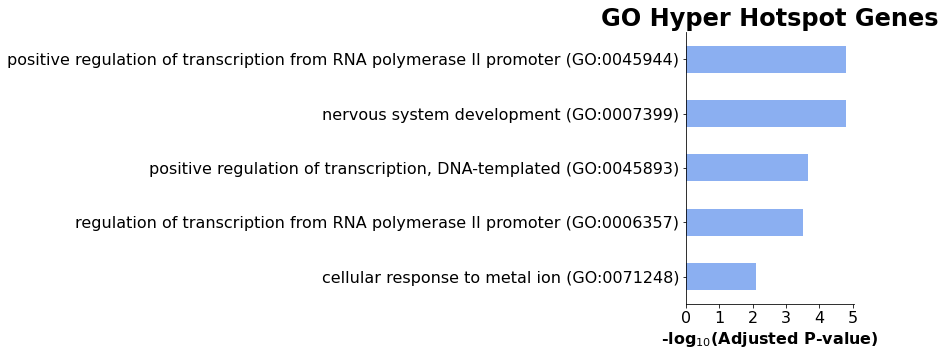

In [28]:
barplot(to_plot,
          column="Adjusted P-value",
          title=f'GO {_type} Hotspot Genes',
          cutoff=0.01,
          group='_type',
          size=10,
          top_term=10,
          figsize=(3,5),
          color=[ 'cornflowerblue']) #lightcoral
plt.savefig(f'figure/{ct}.{_type}.Hotspot.Gene.GO.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [23]:
overlap_df[overlap_df[7] == 'Arhgef2'] 

,0,1,2,3,4,5,6,7
1589,chr3,88619500,88620000,chr3,88605966,88648052,ENSMUSG00000028059.15,Arhgef2
1591,chr3,88624500,88625000,chr3,88605966,88648052,ENSMUSG00000028059.15,Arhgef2


In [24]:
# barplot(hyper_df,
#               column="Adjusted P-value",
#               group='_type',
#               title='GO Hyper Hotspot Genes',
#               size=10,
#               cutoff=0.01,
#               top_term=10,
#               figsize=(3,5),
#               color=[ 'lightcoral'] 
#              )
# plt.savefig('figure/Hyper.Hotspot.Gene.GO.pdf', bbox_inches='tight', dpi=300)
# plt.close()